In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from datetime import date, timedelta, datetime
from dateutil.relativedelta import relativedelta

In [3]:
# sf (subject frame) to adjust titles manually for now
# TODO - make lookup table for all WEO subject/unit combos
col_rename = ['iso','country','subject','units','scale','notes','2023']
sf = pd.read_csv('data/weo.csv')
sf.columns = col_rename
sf = sf[['subject','units']].drop_duplicates()
sf = sf[~sf.subject.isnull()]
sf['order'] = [1, 3, 2, 4, 7, 8, 5, 6, 12, 11, 10, 9]
sf['title'] = ['GDP Growth (%)','GDP (level, PPP $)', 'GDP per capita (level, PPP $)',
               'Output gap (% of pGDP)','Investment (% of GDP)','Savings (% of GDP)',
               'Inflation (%)','Unemployment (%)',
               'Gov Revenue (% of GDP)','Gov Borrowing (% of GDP)','Gov Debt (gross, % of GDP)',
               'CA Balance (% of GDP)']
sf = sf.sort_values(by=['order']).reset_index(drop=True)
titles = list(sf['title'].unique())

df = pd.read_csv('weo.csv')
df.columns = col_rename
df = df[~df['subject'].isnull()]
df = pd.merge(df, sf, on=['subject', 'units'], how='left')
df = pd.pivot(df, index='iso', columns='order', values='2023')
df.columns = titles
for c in df.columns: 
    df[c] = df[c].str.replace(',','')
    df[c] = pd.to_numeric(df[c],errors='coerce')
    
df.loc['MYS']

GDP Growth (%)                       4.380
GDP per capita (level, PPP $)    35353.620
GDP (level, PPP $)                1185.310
Output gap (% of pGDP)                 NaN
Inflation (%)                        2.812
Unemployment (%)                     4.250
Investment (% of GDP)               21.178
Savings (% of GDP)                  23.413
CA Balance (% of GDP)                2.235
Gov Debt (gross, % of GDP)          69.974
Gov Borrowing (% of GDP)            -3.776
Gov Revenue (% of GDP)              15.581
Name: MYS, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_7492\1594845874.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'charts/weo_mys_world.png', bbox_inches='tight', pad_inches=0.2, dpi=400)
c:\Users\user\env_python\lyn-macro\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


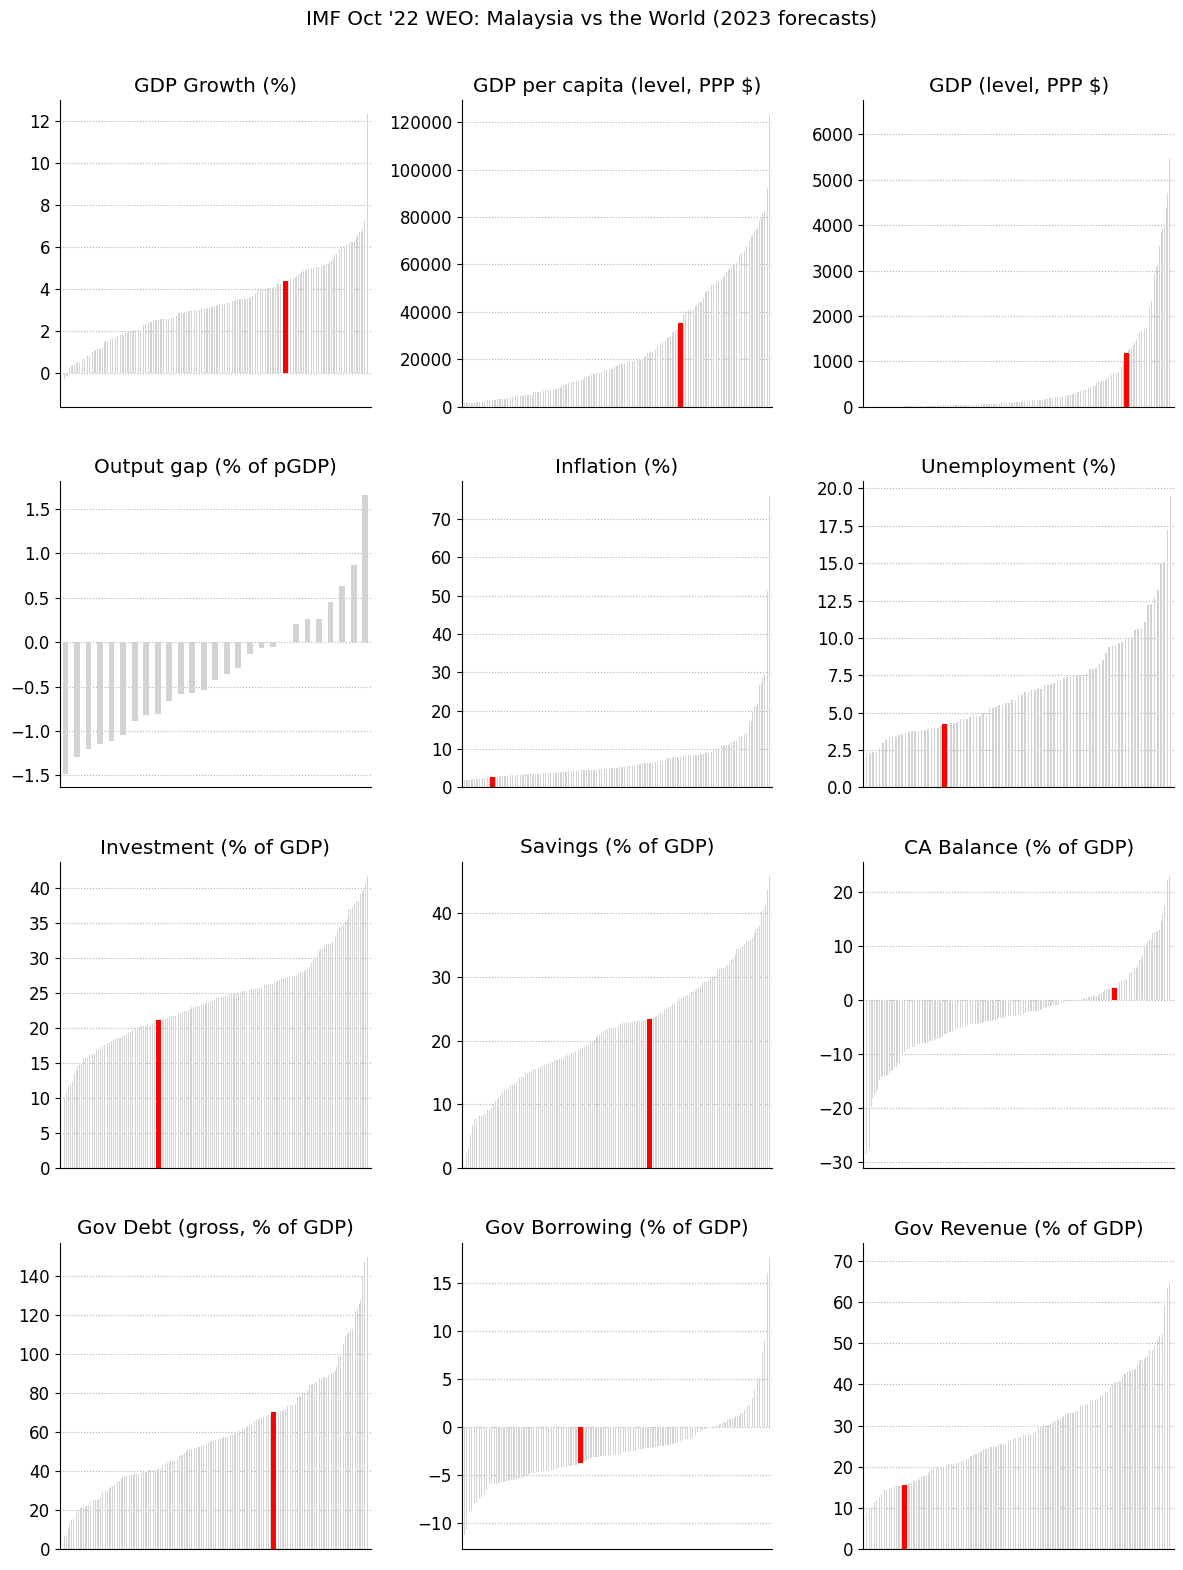

In [4]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 12,
                     'font.family': 'sans-serif',
                     'grid.linestyle': 'dotted',
                     'figure.figsize': [12, 16],
                     'figure.autolayout': True})

fig, ax = plt.subplots(4, 3, sharex=False, sharey=False)  # use sharey=True for common y-axis

axes = ax.ravel()
for i in range(len(df.columns)):
    c = titles[i]
    tf = df[~df[c].isnull()].copy()[[c]].sort_values(by=c).reset_index()
    if i != 3: tf = tf[3:-3]
    tf[c].plot(kind='bar', ax=axes[i], color='lightgrey')
    tf.loc[~tf.iso.isin(['MYS']), c] = np.nan
    tf[c].plot(kind='bar', ax=axes[i], color='red', width=len(tf)/60)
    axes[i].set_axisbelow(True)
    axes[i].yaxis.grid(True)
    axes[i].axes.yaxis.set_visible(True)
    axes[i].axes.xaxis.set_visible(False)
    axes[i].xaxis.set_tick_params(length=0)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].set_title('\n' + c)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.suptitle('IMF Oct \'22 WEO: Malaysia vs the World (2023 forecasts)\n')
plt.savefig(f'charts/weo_mys_world.png', bbox_inches='tight', pad_inches=0.2, dpi=400)